In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Conv1D, GlobalMaxPool1D, Input
from keras.layers import Dense, Dropout, MaxPooling1D
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split


data = pd.read_csv('/content/train.csv')

Using TensorFlow backend.


In [0]:
data = data.values
X_train = data[:,1]
Y_train = data[:,2]

print(Y_train)

[0 0 0 ... 0 0 0]


In [0]:
print(X_train)
print(Y_train)

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, instead o

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
encoded = tokenizer.texts_to_sequences(X_train)

print(X_train[8])
print(encoded[8:9])

Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169
[[263, 22, 1, 286, 34847, 24, 1476, 2, 6, 489, 73, 14, 9215, 2, 330, 215, 10, 1, 23, 1473, 51, 47, 2898, 15, 35, 12, 199, 73, 1051, 1060, 9, 11, 16, 57, 1390, 37, 48, 40, 81, 11, 12, 480, 17, 5, 273, 7, 18, 55, 2, 1, 4850, 8153, 27, 26, 78, 669, 5, 1368, 11, 687, 2, 96147, 96148, 53, 8, 5, 702, 7774, 23, 9, 1094, 6, 46, 468, 41, 251, 16, 159, 324, 21, 3566, 10, 13824, 3439, 4584, 3890, 4851]]


In [0]:
max_len = 0;
for i in range(0, len(encoded)):
    if max_len < len(encoded[i]):
        max_len = len(encoded[i])

max_len = max_len + 1
print(max_len)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1404
210338


In [0]:
from keras.preprocessing.sequence import pad_sequences
padded_docs = pad_sequences(encoded, maxlen=1404, padding='post')
print(padded_docs)
X_train, X_test, Y_train, Y_test = train_test_split( padded_docs, Y_train, test_size=0.2, random_state=42)

[[  688    75     1 ...     0     0     0]
 [96145    52  2635 ...     0     0     0]
 [  412   437    73 ...     0     0     0]
 ...
 [34278  7330  5208 ...     0     0     0]
 [    4    11   574 ...     0     0     0]
 [    4     7   134 ...     0     0     0]]


In [0]:
input_seq = Input(shape=(1404, ))
embed = Embedding(vocab_size, 100, input_length=1404)(input_seq)
x = Flatten()(embed)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
classi = Dense(1, activation='sigmoid')(x)
classifier = Model(input_seq, classi)
classifier.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
print(classifier.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1404)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1404, 100)         21033800  
_________________________________________________________________
flatten_1 (Flatten)          (None, 140400)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              143770624 
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256

In [0]:
print(X_train)
print(X_test)

[[14832  9031    56 ...     0     0     0]
 [  674    85   819 ...     0     0     0]
 [    1  5487     3 ...     0     0     0]
 ...
 [    7   578   172 ...     0     0     0]
 [  628  1560     7 ...     0     0     0]
 [    6    19   240 ...     0     0     0]]
[[13327    19     6 ...     0     0     0]
 [34915  1411    94 ...     0     0     0]
 [ 4070    46  4504 ...     0     0     0]
 ...
 [  345 63107   277 ...     0     0     0]
 [    5  1684   576 ...     0     0     0]
 [28891    89    20 ...     0     0     0]]


In [0]:
classifier.fit(X_train, Y_train, batch_size=512, epochs = 40, 
    verbose=1, validation_data= (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 127656 samples, validate on 31915 samples
Epoch 1/40
127656/127656 [==============================] - 42s 331us/step - loss: 0.3183 - accuracy: 0.9021 - val_loss: 0.3280 - val_accuracy: 0.9042
Epoch 2/40
127656/127656 [==============================] - 40s 316us/step - loss: 0.2835 - accuracy: 0.9055 - val_loss: 0.2242 - val_accuracy: 0.9206
Epoch 3/40
127656/127656 [==============================] - 40s 315us/step - loss: 0.1889 - accuracy: 0.9346 - val_loss: 0.1479 - val_accuracy: 0.9485
Epoch 4/40
127656/127656 [==============================] - 40s 317us/step - loss: 0.1212 - accuracy: 0.9578 - val_loss: 0.1790 - val_accuracy: 0.9450
Epoch 5/40
127656/127656 [==============================] - 40s 315us/step - loss: 0.1037 - accuracy: 0.9644 - val_loss: 0.1245 - val_accuracy: 0.9579
Epoch 6/40
127656/127656 [==============================] - 40s 314us/step - loss: 0.0712 - accuracy: 0.9762 - val_loss: 0.1644 - val_accuracy: 0.9431
Epoch 7/40
127656/127656 [=================

In [0]:
predictions = classifier.predict(X_test)
print(predictions)

for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(predictions)

[[1.9914138e-01]
 [1.1026816e-09]
 [1.4702312e-08]
 ...
 [2.5574178e-17]
 [9.9998796e-01]
 [2.2021644e-10]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [0]:
from sklearn.metrics import confusion_matrix, classification_report

print(predictions)
Y_test = [[i] for i in Y_test]
print(Y_test)
print(classification_report(Y_test, predictions))
pd.DataFrame(
   confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0

Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28338   521
       Toxic           932  2124

In [0]:
predictions = classifier.predict(X_test)
print(predictions)

[[1.9914138e-01]
 [1.1026816e-09]
 [1.4702312e-08]
 ...
 [2.5574178e-17]
 [9.9998796e-01]
 [2.2021644e-10]]


roc_curve 0.9473861754542623


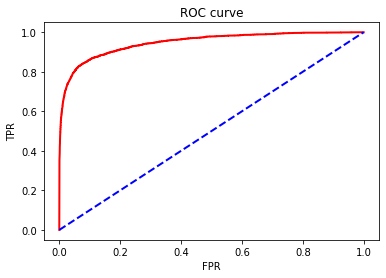

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(Y_test,predictions)
print("roc_curve {}".format(roc_auc_score(Y_test,predictions)));
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score
print("accuracy {}".format(accuracy_score(Y_test,predictions)));
print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

accuracy 0.9544728184239386
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     28859
           1       0.80      0.70      0.75      3056

    accuracy                           0.95     31915
   macro avg       0.89      0.84      0.86     31915
weighted avg       0.95      0.95      0.95     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28338   521
       Toxic           932  2124

In [0]:
import pandas as pd
data = pd.read_csv('/content/TestFile.csv')
data = data.values
X_train = data[0:14,0]
print(X_train)
encoded = tokenizer.texts_to_sequences(X_train)
padded_docs = pad_sequences(encoded, maxlen=1404, padding='post')
print(padded_docs)
predictions = classifier.predict(padded_docs)
print(predictions)
for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
print(predictions)

['I do not think you are a bad human being your circumstances made you that '
 'He had killed many people in the past and would continue to kill if we do not do somehing about it'
 'You need some help, his retaeded brother was brave enough to serve in the military '
 'The word fuck is very inappropriate please refrain from using. It leaves a bad impression.'
 'The murder rates for those cities are high I would suggest looking after your family. These psychopaths are dagerous, keep yourself safe.'
 'In a time were rape and harassment are widespread, we need to stand up againt the bullies.'
 'I will kill your faimily, nice good wonderful.'
 "Slavery is forbidden in Islam?  That seems to run counter to history.  Weren't the Mamluks, simply to mention one group, former slaves?"
 'The original Homophobia in the Black Diasporic community article is god awful.  So I moved that articles information here.'
 'refuse to be open to other people and ideas'
 'The anus is, in fact, part of the penis.